In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import math

In [125]:
df=pd.read_excel(r'C:\Users\ans025\Desktop\Final_train.xlsx')
df1=pd.read_excel(r'C:\Users\ans025\Desktop\Final_test.xlsx')

In [126]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [127]:
df.shape

(5961, 7)

In [128]:
full=pd.concat([df,df1],ignore_index=True)

In [129]:
miss=[]
for i, row in full.iterrows():
    miss.append(re.sub('[,]', ' ', str(row["Miscellaneous_Info"])))

In [130]:
full["Miss"]=miss

In [131]:
from nltk.corpus import stopwords
import string
import re
import nltk
from nltk.stem.porter import PorterStemmer

In [132]:
missi=[]
for i, row in full.iterrows():
    missi.append(re.sub('[,/]', '', str(row["Miscellaneous_Info"])))

In [133]:
full["missi"]=missi

In [134]:
missi1=[]
for i, row in full.iterrows():
    missi1.append(re.sub(' +', ' ', str(row["missi"])))

In [135]:
full["Missi1"]=missi1

In [136]:
full["Missi1"].replace("nan","####",inplace=True)

In [137]:
from sklearn.feature_extraction.text import CountVectorizer
cv1 = CountVectorizer(max_features=200)
y = cv1.fit_transform(full["Missi1"]).toarray()

In [138]:
len(cv1.vocabulary_)

200

In [139]:
y.shape

(7948, 200)

In [140]:
thirty= list(y)
thirty1=pd.DataFrame(thirty)

In [141]:
qual=[]
for i, row in full.iterrows():
    qual.append(re.sub('[,]', ' ', str(row["Qualification"])))

In [142]:
full["Qual"]=qual

In [143]:
qual1=[]
for i, row in full.iterrows():
    qual1.append(re.sub('[-]', '', str(row["Qual"])))

In [144]:
full["Qual1"]=qual1

In [146]:
qual2=[]
for i, row in full.iterrows():
    qual2.append(re.sub(' +', ' ', str(row["Qual1"])))

In [147]:
full["Qual2"]=qual2

In [148]:
full["Qual2"].replace("nan","####",inplace=True)

In [149]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=50)
X = cv.fit_transform(full["Qual2"]).toarray()

In [150]:
twenty= list(X)
twenty1=pd.DataFrame(twenty)

In [151]:
Rating1=[]
for i, row in df.iterrows():
    Rating1.append(re.sub('[%]', '', str(row["Rating"])))

In [152]:
Rating1test=[]
for i, row in df1.iterrows():
    Rating1test.append(re.sub('[%]', '', str(row["Rating"])))

In [153]:
Rating_=[]
for i in range(0,len(Rating1)):
    Rating_.append(float(Rating1[i]))

In [154]:
Rating_test=[]
for i in range(0,len(Rating1test)):
    Rating_test.append(float(Rating1test[i]))

In [155]:
df["Rating_"]=Rating_

In [156]:
df1["Rating_"]=Rating_test

In [157]:
df["Rating_NA"]=df["Rating"].isna()

In [158]:
df1["Rating_NA"]=df1["Rating"].isna()

In [159]:
df['Rating_'].fillna(int(-999),inplace=True)

In [160]:
df1['Rating_'].fillna(int(-999),inplace=True)

In [161]:
Experience1=[]
for i, row in df.iterrows():
    Experience1.append(re.sub('[ years experience]', '', str(row["Experience"])))

In [162]:
Experience1test=[]
for i, row in df1.iterrows():
    Experience1test.append(re.sub('[ years experience]', '', str(row["Experience"])))

In [163]:
Experience_=[]
for i in range(0,len(Experience1)):
    Experience_.append(float(Experience1[i]))

In [164]:
Experience_test=[]
for i in range(0,len(Experience1test)):
    Experience_test.append(float(Experience1test[i]))

In [165]:
df["Experience_"]=Experience_

In [166]:
df1["Experience_"]=Experience_test

In [167]:
lol=df["Place"].str.split(", ",n=1,expand=True)

In [168]:
df["Location"]=lol[0]

In [169]:
df["City"]=lol[1]

In [170]:
lol1=df1["Place"].str.split(", ",n=1,expand=True)

In [171]:
df1["Location"]=lol1[0]

In [172]:
df1["City"]=lol1[1]

In [173]:
unknownlocation=['Alipur',
 'Aroor',
 'Ayanambakkam',
 'Ayyappankavu',
 'BHEL',
 'Bachupally',
 'Bhandup',
 'Bhogal',
 'Burari',
 'Chandrayangutta',
 'Cheranalloor',
 'Chickpet',
 'Choolai',
 'Delhi Cantonment',
 'Dindarpur',
 'Dwarka Sector 12',
 'Ernakulam',
 'Gamdevi',
 'Hasthinapuram',
 'Hastsal',
 'Hongasandra',
 'Hosur Road',
 'Iyyappanthangal',
 'JP Nagar 9 Phase',
 'Jafferkhanpet',
 'Jayanagar 2 Block',
 'KH Road',
 'Kadubeesanahalli',
 'Kalu Sarai',
 'Kanjoor',
 'Kapra',
 'Kaudiar',
 'Khar East',
 'Koramangala 7 Block',
 'Kudlu',
 'Kurla',
 'Lingarajapuram',
 'Madambakkam',
 'Madhavaram',
 'Mahavir Enclave',
 'Mahipalpur',
 'Manchavilakom',
 'Meerpet',
 'Nacharam',
 'Nandambakkam',
 'Nedumangad',
 'Nedumbassery',
 'Nemom',
 'Outer Ring Road',
 'Padi',
 'Palghar',
 'Pattabiram',
 'Periyanaickenpalayam',
 'Poothotta',
 'Pratap Nagar',
 'Ramakrishna Puram',
 'Rohini Sector 20',
 'Rohini West',
 'Safilguda',
 'Sagar Road',
 'Sarvapriya Vihar',
 'Seeranaickenpalayam',
 'Sewri',
 'Shadipur',
 'Sriniwaspuri',
 'Tavarekere',
 'Tv Thampanoor',
 'Vikas Nagar',
 'Vishwas Nagar',
 'Warasiguda',
 'Yemalur']

In [174]:
len(unknownlocation)

71

In [175]:
twentytrain=twenty1.iloc[0:5961,:]

In [176]:
twentytest=twenty1.iloc[5961:7949,:]

In [177]:
thritytrain1=thirty1.iloc[0:5961,:]

In [178]:
thritytest1=thirty1.iloc[5961:7949,:]

In [179]:
thritytest1.reset_index(drop=True,inplace=True)

In [180]:
twentytest.reset_index(drop=True,inplace=True)

In [181]:
df=pd.concat([df,twentytrain,thritytrain1],axis=1,ignore_index=True)

In [182]:
lol=pd.concat([df1,twentytest,thritytest1],axis=1,ignore_index=True)

In [183]:
samekey=pd.DataFrame()

In [184]:
for i in range(0,len(unknownlocation)):
    lol1=lol[lol[9] == unknownlocation[i]]
    samekey=pd.concat([samekey,lol1],axis=0)

In [185]:
index=samekey.index.tolist()

In [186]:
len(index)

83

In [187]:
for i in range(0,len(unknownlocation)):
    lol=lol[lol[9] != unknownlocation[i]]

In [188]:
df.drop([0,1,2,3,5],axis=1,inplace=True)

In [189]:
lol.drop([0,1,2,3,5],axis=1,inplace=True)

In [190]:
samekey.drop([0,1,2,3,5],axis=1,inplace=True)

In [193]:
lol.head()

,4,6,7,8,9,10,11,12,13,14,...,251,252,253,254,255,256,257,258,259,260
0,General Medicine,-999.0,True,35.0,Ghatkopar East,Mumbai,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ENT Specialist,-999.0,True,31.0,West Marredpally,Hyderabad,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Dermatologists,70.0,False,40.0,KK Nagar,Chennai,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ayurveda,-999.0,True,0.0,New Ashok Nagar,Delhi,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Dentist,100.0,False,16.0,Kanakpura Road,Bangalore,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
df.head()

,4,6,7,8,9,10,11,12,13,14,...,252,253,254,255,256,257,258,259,260,261
0,Homeopath,100,100.0,False,24.0,Kakkanad,Ernakulam,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ayurveda,350,98.0,False,12.0,Whitefield,Bangalore,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,ENT Specialist,300,-999.0,True,9.0,Mathikere - BEL,Bangalore,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ayurveda,250,-999.0,True,12.0,Bannerghatta Road,Bangalore,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ayurveda,250,100.0,False,20.0,Keelkattalai,Chennai,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
df2=df.drop([10],axis=1)

In [195]:
df1=lol

In [196]:
df["LocationNA"]=df[10].isna()
df1["LocationNA"]=df1[9].isna()

In [197]:
df["CityNA"]=df[11].isna()
df1["CityNA"]=df1[10].isna()

In [198]:
df[11].fillna("UnknownCity",inplace=True)
df1[10].fillna("UnknownCity",inplace=True)
df2[11].fillna("UnknownCity",inplace=True)

In [199]:
df[10].fillna("UnknownLocation",inplace=True)
df1[9].fillna("UnknownLocation",inplace=True)

In [200]:
groupbylocation=df.groupby(10)[6].mean()
df['LOCDmean']=df[10].map(groupbylocation)
df1['LOCDmean']=df1[9].map(groupbylocation)

In [201]:
groupbylocationmin=df.groupby(10)[6].min()
df['LOCDmin']=df[10].map(groupbylocationmin)
df1['LOCDmin']=df1[9].map(groupbylocationmin)

In [202]:
groupbylocationmax=df.groupby(10)[6].max()
df['LOCDmax']=df[10].map(groupbylocationmax)
df1['LOCDmax']=df1[9].map(groupbylocationmax)

In [203]:
samekey.drop([9],axis=1,inplace=True)

In [204]:
groupbycitymean=df.groupby(11)[6].mean()
df['Citymean']=df[11].map(groupbycitymean)
df1['Citymean']=df1[10].map(groupbycitymean)
df2['Citymean']=df2[11].map(groupbycitymean)

In [205]:
groupbycitymin=df.groupby(11)[6].min()
df['Citymin']=df[11].map(groupbycitymin)
df1['Citymin']=df1[10].map(groupbycitymin)
df2['Citymin']=df2[11].map(groupbycitymin)

In [206]:
groupbycitymax=df.groupby(11)[6].max()
df['Citymax']=df[11].map(groupbycitymax)
df1['Citymax']=df1[10].map(groupbycitymax)
df2['Citymax']=df2[11].map(groupbycitymax)

In [207]:
groupbycitydev=df.groupby(11)[6].std()
df['Citystdev']=df[11].map(groupbycitydev)
df1['Citystdev']=df1[10].map(groupbycitydev)
df2['Citystdev']=df2[11].map(groupbycitydev)

In [208]:
samekey['Citymean']=samekey[10].map(groupbycitymean)
samekey['Citymin']=samekey[10].map(groupbycitymin)
samekey['Citymax']=samekey[10].map(groupbycitymax)
samekey['Citystdev']=samekey[10].map(groupbycitydev)

In [209]:
stdev=df['Citystdev'].std()
stdev2=df2['Citystdev'].std()

In [210]:
df['Citystdev']=df['Citystdev'].fillna(stdev,axis=0)
df2['Citystdev']=df2['Citystdev'].fillna(stdev,axis=0)

In [211]:
df1.head()

,4,6,7,8,9,10,11,12,13,14,...,260,LocationNA,CityNA,LOCDmean,LOCDmin,LOCDmax,Citymean,Citymin,Citymax,Citystdev
0,General Medicine,-999.0,True,35.0,Ghatkopar East,Mumbai,0,0,0,0,...,0,False,False,333.684211,50,800,308.292863,10,920,234.584964
1,ENT Specialist,-999.0,True,31.0,West Marredpally,Hyderabad,0,0,0,0,...,0,False,False,361.111111,150,500,307.507886,20,800,152.340317
2,Dermatologists,70.0,False,40.0,KK Nagar,Chennai,0,0,0,0,...,0,False,False,271.428571,100,500,283.602339,50,950,167.797081
3,Ayurveda,-999.0,True,0.0,New Ashok Nagar,Delhi,0,0,0,1,...,0,False,False,233.333333,100,300,363.006757,50,900,212.523175
4,Dentist,100.0,False,16.0,Kanakpura Road,Bangalore,0,0,0,0,...,0,False,False,345.000000,250,500,328.842607,30,900,159.136744


In [212]:
df["ProfLoc"]=df[4].astype(str) + "_" + df[10].astype(str)
df1["ProfLoc"]=df1[4].astype(str) + "_" + df1[9].astype(str)

In [213]:
groupbyprofloc=df.groupby('ProfLoc')[6].mean()
df['PLocmean']=df['ProfLoc'].map(groupbyprofloc)
df1['PLocmean']=df1['ProfLoc'].map(groupbyprofloc)

In [214]:
df1['ProfLoc'].isnull().sum()

0

In [215]:
df1[df1['PLocmean'].isna()]

,4,6,7,8,9,10,11,12,13,14,...,CityNA,LOCDmean,LOCDmin,LOCDmax,Citymean,Citymin,Citymax,Citystdev,ProfLoc,PLocmean
2,Dermatologists,70.0,False,40.0,KK Nagar,Chennai,0,0,0,0,...,False,271.428571,100,500,283.602339,50,950,167.797081,Dermatologists_KK Nagar,NaN
3,Ayurveda,-999.0,True,0.0,New Ashok Nagar,Delhi,0,0,0,1,...,False,233.333333,100,300,363.006757,50,900,212.523175,Ayurveda_New Ashok Nagar,NaN
10,Dentist,100.0,False,4.0,Erragadda,Hyderabad,0,0,0,0,...,False,358.333333,100,500,307.507886,20,800,152.340317,Dentist_Erragadda,NaN
14,ENT Specialist,-999.0,True,4.0,Madandapuram,Chennai,0,0,0,0,...,False,200.000000,200,200,283.602339,50,950,167.797081,ENT Specialist_Madandapuram,NaN
16,Dermatologists,87.0,False,16.0,Tis Hazari,Delhi,0,0,0,0,...,False,550.000000,550,550,363.006757,50,900,212.523175,Dermatologists_Tis Hazari,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,Dermatologists,-999.0,True,6.0,Ramapuram,Chennai,0,0,0,0,...,False,200.000000,200,200,283.602339,50,950,167.797081,Dermatologists_Ramapuram,NaN
1967,Dentist,98.0,False,13.0,Yelahanka,Bangalore,0,0,0,0,...,False,329.333333,150,750,328.842607,30,900,159.136744,Dentist_Yelahanka,NaN
1970,Dentist,-999.0,True,7.0,Sundarapuram,Coimbatore,0,1,0,0,...,False,200.000000,200,200,154.298246,50,700,77.339794,Dentist_Sundarapuram,NaN
1974,ENT Specialist,-999.0,True,19.0,Munirka,Delhi,0,0,0,0,...,False,460.000000,300,600,363.006757,50,900,212.523175,ENT Specialist_Munirka,NaN


In [216]:
df1['PLocmean'].isnull().sum()

339

In [217]:
df1.shape

(1904, 267)

In [218]:
df['PLocmean'].mean()

307.9446401610457

In [219]:
mean=df1['PLocmean'].mean()

In [220]:
mean

322.8976478322505

In [221]:
df1['PLocmean']=df1['PLocmean'].fillna(mean,axis=0)

In [222]:
df1['PLocmean'].isnull().sum()

0

In [223]:
df.drop(['ProfLoc'],axis=1,inplace=True)
df1.drop(['ProfLoc'],axis=1,inplace=True)

In [224]:
X=df.drop([6],axis=1)

In [225]:
X1=df2.drop([6],axis=1)

In [226]:
y=df[6]

In [227]:
y1=df2[6]

In [228]:
test=df1

In [229]:
test2=samekey

In [230]:
X.columns=range(X.shape[1])

In [231]:
X1.columns=range(X1.shape[1])

In [232]:
test.columns=range(test.shape[1])

In [233]:
test2.columns=range(test2.shape[1])

In [234]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,General Medicine,-999.0,True,35.0,Ghatkopar East,Mumbai,0,0,0,0,...,False,False,333.684211,50,800,308.292863,10,920,234.584964,350.000000
1,ENT Specialist,-999.0,True,31.0,West Marredpally,Hyderabad,0,0,0,0,...,False,False,361.111111,150,500,307.507886,20,800,152.340317,400.000000
2,Dermatologists,70.0,False,40.0,KK Nagar,Chennai,0,0,0,0,...,False,False,271.428571,100,500,283.602339,50,950,167.797081,322.897648
3,Ayurveda,-999.0,True,0.0,New Ashok Nagar,Delhi,0,0,0,1,...,False,False,233.333333,100,300,363.006757,50,900,212.523175,322.897648
4,Dentist,100.0,False,16.0,Kanakpura Road,Bangalore,0,0,0,0,...,False,False,345.000000,250,500,328.842607,30,900,159.136744,300.000000


In [235]:
from sklearn.preprocessing import LabelEncoder
cols=(0,2,4,5,256,257)
for c in cols:
    lbl=LabelEncoder()
    lbl.fit(list(X[c].values))
    X[c]=lbl.transform(list(X[c].values))
    test[c]=lbl.transform(list(test[c].values))

In [236]:
X1.head()

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,Homeopath,100.0,False,24.0,Ernakulam,0,0,0,0,0,...,0,0,0,0,0,0,188.431373,10,600,111.474080
1,Ayurveda,98.0,False,12.0,Bangalore,0,0,1,1,0,...,0,0,1,0,0,0,328.842607,30,900,159.136744
2,ENT Specialist,-999.0,True,9.0,Bangalore,0,0,0,0,0,...,0,0,0,0,0,0,328.842607,30,900,159.136744
3,Ayurveda,-999.0,True,12.0,Bangalore,0,0,0,1,0,...,0,0,0,0,0,0,328.842607,30,900,159.136744
4,Ayurveda,100.0,False,20.0,Chennai,0,0,0,1,0,...,0,0,0,0,0,0,283.602339,50,950,167.797081


In [237]:
from sklearn.preprocessing import LabelEncoder
cols=(0,2,4)
for c in cols:
    lbl=LabelEncoder()
    lbl.fit(list(X1[c].values))
    X1[c]=lbl.transform(list(X1[c].values))
    test2[c]=lbl.transform(list(test2[c].values))

In [238]:
from sklearn.ensemble import AdaBoostRegressor

In [239]:
ada=AdaBoostRegressor(n_estimators=800)

In [240]:
ada.fit(X,y)

AdaBoostRegressor(n_estimators=800)

In [241]:
pred_ada=ada.predict(test)

In [242]:
from sklearn.ensemble import GradientBoostingRegressor

In [243]:
gb=GradientBoostingRegressor(n_estimators=500)

In [244]:
gb.fit(X,y)

GradientBoostingRegressor(n_estimators=500)

In [245]:
pred_gb=gb.predict(test)

In [246]:
from sklearn.ensemble import BaggingRegressor

In [247]:
br=BaggingRegressor(n_estimators=700)

In [248]:
br.fit(X,y)

BaggingRegressor(n_estimators=700)

In [249]:
pred_br=br.predict(test)

In [250]:
from sklearn.ensemble import ExtraTreesRegressor

In [251]:
etr=ExtraTreesRegressor(n_estimators=500)

In [252]:
etr.fit(X,y)

ExtraTreesRegressor(n_estimators=500)

In [253]:
pred_etr=etr.predict(test)

In [254]:
from sklearn.neural_network import MLPRegressor

In [255]:
mlp=MLPRegressor()

In [256]:
mlp.fit(X,y)

MLPRegressor()

In [257]:
pred_mlp=mlp.predict(test)

In [258]:
from sklearn.neighbors import KNeighborsRegressor

In [259]:
knn=KNeighborsRegressor(n_neighbors=500)

In [260]:
knn.fit(X,y)

KNeighborsRegressor(n_neighbors=500)

In [261]:
pred_knn=knn.predict(test)

In [262]:
from sklearn.tree import DecisionTreeRegressor

In [263]:
dtr=DecisionTreeRegressor()

In [264]:
dtr.fit(X,y)

DecisionTreeRegressor()

In [265]:
pred_dtr=dtr.predict(test)

In [266]:
from sklearn.ensemble import RandomForestRegressor

In [267]:
rfc=RandomForestRegressor(n_estimators=500)

In [269]:
rfc.fit(X,y)

RandomForestRegressor(n_estimators=500)

In [270]:
pred_rfc=rfc.predict(test)

In [272]:
rfc1=RandomForestRegressor(n_estimators=100)

In [273]:
rfc1.fit(X1,y1)

RandomForestRegressor()

In [274]:
pred1=rfc1.predict(test2)

In [275]:
pred_rfc.shape

(1904,)

In [276]:
pred1.shape

(83,)

In [290]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,5,100.0,0,24.0,296,4,0,0,0,0,...,0,0,186.153846,70,300,188.431373,10,600,111.474080,125.000000
1,0,98.0,0,12.0,856,0,0,0,1,1,...,0,0,398.936170,100,600,328.842607,30,900,159.136744,322.727273
2,3,-999.0,1,9.0,452,0,0,0,0,0,...,0,0,268.181818,100,500,328.842607,30,900,159.136744,300.000000
3,0,-999.0,1,12.0,68,0,0,0,0,1,...,0,0,410.256410,100,800,328.842607,30,900,159.136744,208.333333
4,0,100.0,0,20.0,335,1,0,0,0,1,...,0,0,166.666667,100,250,283.602339,50,950,167.797081,250.000000


Feature ranking:
1. feature 265 (0.615792)
2. feature 3 (0.059145)
3. feature 258 (0.021134)
4. feature 4 (0.020226)
5. feature 260 (0.019046)
6. feature 1 (0.013082)
7. feature 259 (0.009934)
8. feature 264 (0.007829)
9. feature 0 (0.006891)
10. feature 41 (0.005691)
11. feature 39 (0.005613)
12. feature 245 (0.005295)
13. feature 5 (0.004926)
14. feature 261 (0.004536)
15. feature 262 (0.004101)
16. feature 263 (0.003991)
17. feature 34 (0.003968)
18. feature 190 (0.003915)
19. feature 27 (0.003790)
20. feature 53 (0.003275)
21. feature 21 (0.003272)
22. feature 38 (0.003183)
23. feature 23 (0.003124)
24. feature 11 (0.003021)
25. feature 134 (0.002952)
26. feature 32 (0.002910)
27. feature 7 (0.002892)
28. feature 251 (0.002740)
29. feature 25 (0.002545)
30. feature 29 (0.002490)
31. feature 149 (0.002360)
32. feature 103 (0.002285)
33. feature 42 (0.002259)
34. feature 235 (0.002144)
35. feature 2 (0.002138)
36. feature 43 (0.002072)
37. feature 17 (0.001995)
38. feature 77 (0.0019

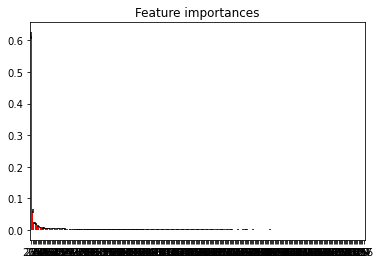

In [284]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [286]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [287]:
models=[[KNeighborsRegressor (n_neighbors=300), GradientBoostingRegressor (n_estimators=300),
         ExtraTreesRegressor (n_estimators=300) , DecisionTreeRegressor (),
         AdaBoostRegressor (n_estimators=300)
        ],
        [RandomForestRegressor (n_estimators=400)]
       ]

In [293]:
def rmsle(y, y_):
   log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
   log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
   calc = (log1 - log2) ** 2
   return np.sqrt(np.mean(calc))

In [294]:
rmsle(pred_rfc,y)

ValueError: operands could not be broadcast together with shapes (1904,) (5961,) 

In [295]:
y.head()

0    100
1    350
2    300
3    250
4    250
Name: 6, dtype: int64

In [296]:
pred_ada

array([382.8575152 , 382.8575152 , 313.53193209, ..., 167.68895349,
       278.53744311, 328.50120627])

In [297]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [298]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

NameError: name 'n_estimators' is not defined

In [299]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold

In [301]:
folds = 3
param_comb = 5

skf = KFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(rfc, param_distributions=random_grid, n_iter=param_comb, scoring=lol, n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001 )

NameError: name 'random_grid' is not defined

In [300]:
random_search.fit(X, y)

NameError: name 'random_search' is not defined

In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)

In [ ]:
test2.shape

In [ ]:
pred1.shape

In [ ]:
sub=pd.DataFrame()
sub[0]=test2[0]
sub.drop([0],axis=1,inplace=True)
sub['Fees']=pred1

In [ ]:
finalsub=pd.concat([sub,sub1],axis=0)
finalsub=finalsub.sort_index(axis=0)

In [ ]:
pred_xgb=finalsub['Fees']

In [ ]:
finalsub.to_excel("Try.xlsx")

In [ ]:
from sklearn.metrics import make_scorer
lol=make_scorer(rmsle)

In [ ]:
a=[]

In [ ]:
haha=[]
for i in range(0,len(a)):
    lel=(round(a[i]/50)*50)
    haha.append(lel)

In [ ]:
finalsub['Fees']=round(finalsub['Fees'])

In [ ]:
weights=pd.DataFrame()

In [ ]:
weights['Ada']=pred_ada

In [ ]:
weights['GBR']=pred_gb

In [ ]:
weights['Bagging']=pred_br

In [ ]:
weights['MLP']=pred_mlp

In [ ]:
weights['KNN']=pred_knn

In [ ]:
weights['ExtraTrees']=pred_etr

In [ ]:
weights['DescionTree']=pred_dtr

In [ ]:
weights['LightGBM']=pred_lgbm

In [ ]:
weights['RFC']=pred_rfc

In [ ]:
weights['True']=y

In [ ]:
weights.head()

In [ ]:
X3=weights.drop(['True'],axis=1)
y3=weights['True']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X3,y3)

In [ ]:
lr.coef_

In [279]:
finalsub.shape

NameError: name 'finalsub' is not defined

In [278]:
len(pred_ada)

1904

In [303]:
finalsub['Fees']=((pred_ada*(-0.000000000000000352308068))+(pred_gb*(-0.000000000000000610622664))+(pred_br*(0.000000000000000915933995))+(pred_mlp*(-0.000000000000000235922393))+(pred_knn*(0.0000000000000000138777878))+(pred_etr*(0.0000000000000000693889390))+(pred_dtr*(1))+(pred_rfc*(0.000000000000000152655666)))

NameError: name 'finalsub' is not defined

In [302]:
finalsub.head()

NameError: name 'finalsub' is not defined